<a href="https://colab.research.google.com/github/YuvrajRakheja/ANN/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/YuvrajRakheja/ANN/main/Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
X = dataset.iloc[:, 3:13]

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y=dataset.iloc[:,13]

In [8]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
X=pd.concat([X,geography,gender],axis=1)

In [10]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#ANN MODEL

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
from tensorflow.keras import initializers

In [16]:
model = Sequential()
model.add(Dense(units=11, activation='relu'))
model.add(Dense(units=100, activation='relu',kernel_initializer=initializers.HeUniform()))
model.add(Dense(units=50, activation='relu',kernel_initializer=initializers.GlorotUniform()))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='AdaDelta',loss='binary_crossentropy',metrics=['accuracy'])




In [17]:
model_history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.20)

Epoch 1/50
168/168 [==============================] - 8s 11ms/step - loss: 0.9290 - accuracy: 0.2487 - val_loss: 0.9174 - val_accuracy: 0.2455
Epoch 2/50
168/168 [==============================] - 2s 9ms/step - loss: 0.9097 - accuracy: 0.2591 - val_loss: 0.8976 - val_accuracy: 0.2597
Epoch 3/50
168/168 [==============================] - 2s 9ms/step - loss: 0.8903 - accuracy: 0.2705 - val_loss: 0.8778 - val_accuracy: 0.2731
Epoch 4/50
168/168 [==============================] - 2s 10ms/step - loss: 0.8711 - accuracy: 0.2834 - val_loss: 0.8583 - val_accuracy: 0.2813
Epoch 5/50
168/168 [==============================] - 1s 8ms/step - loss: 0.8522 - accuracy: 0.2981 - val_loss: 0.8393 - val_accuracy: 0.3015
Epoch 6/50
168/168 [==============================] - 2s 10ms/step - loss: 0.8337 - accuracy: 0.3159 - val_loss: 0.8207 - val_accuracy: 0.3187
Epoch 7/50
168/168 [==============================] - 1s 8ms/step - loss: 0.8157 - accuracy: 0.3351 - val_loss: 0.8027 - val_accuracy: 0.3418
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


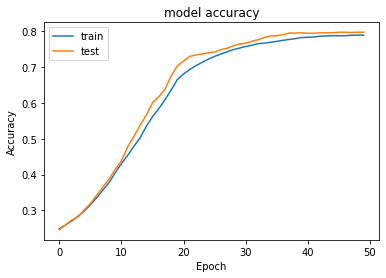

In [18]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

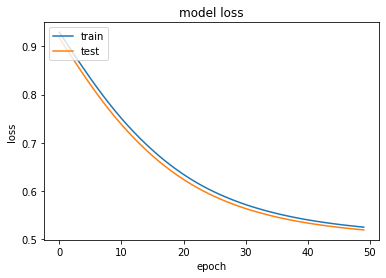

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [23]:
cm

array([[2639,   18],
       [ 623,   20]])

In [24]:
score

0.8057575757575758

In [25]:
model.save('model.h5')

In [26]:
keras.models.load_model('model.h5')

In [27]:
a=keras.models.load_model('model.h5')

In [28]:
for layer in model.layers: 
  print(layer.get_config(), layer.get_weights())

{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 11, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[-0.23381709,  0.41147515, -0.4645634 ,  0.24708198,  0.3020399 ,
         0.45449224,  0.2610177 , -0.18340322,  0.3278327 , -0.04417552,
         0.4893699 ],
       [-0.21947625, -0.00121733,  0.07927252, -0.20337537,  0.40286204,
        -0.40338206, -0.15309146, -0.42460352,  0.0391194 , -0.15990663,
        -0.06120552],
       [-0.2615168 ,  0.01272488,  0.22758   ,  0.16664635, -0.47738206,
         0.26336536, -0.32106546, -0.06083618,  0.27396345, -0.10218068,
        -0.49480185],
       [-0.5162016 ,  0.41479287,  0.43520433,  0.20768958,  0.30380532,
         0.42746654,  0.23416592, -0

Keras Tuner

In [29]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 4.7 MB/s 


In [30]:
from keras_tuner.tuners import RandomSearch

In [32]:
import tensorflow as tf
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [33]:
import keras_tuner as kt
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='churn-model',
    project_name='churn'
    )

In [34]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [35]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 11s]
val_loss: 0.36318084597587585

Best val_loss So Far: 0.3374718129634857
Total elapsed time: 00h 00m 52s
INFO:tensorflow:Oracle triggered exit


In [36]:
best_model = tuner.get_best_models()[0]

In [37]:
tuner.get_best_models()[0]

In [38]:
tuner.results_summary()

Results summary
Results in churn-model/churn
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 448
units_1: 288
learning_rate: 0.0001
units_2: 192
units_3: 224
units_4: 480
units_5: 416
Score: 0.3374718129634857
Trial summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 160
learning_rate: 0.001
units_2: 288
units_3: 96
units_4: 288
units_5: 288
units_6: 32
units_7: 32
units_8: 32
Score: 0.337561696767807
Trial summary
Hyperparameters:
num_layers: 6
units_0: 480
units_1: 288
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 0.3404535949230194
Trial summary
Hyperparameters:
num_layers: 11
units_0: 64
units_1: 352
learning_rate: 0.01
units_2: 512
units_3: 128
units_4: 288
units_5: 256
units_6: 352
units_7: 128
units_8: 64
units_9: 224
units_10: 416
units_11: 480
units_12: 224
units_13: 512
units_14: 64
Score: 0.36318084597587585
Trial summary
Hyperparameters:
num_layers: 15
units_0: 128
units_1: 416
learning_rate: 0.01
units_2: